# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\FinTech\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('/Users/FinTech/PycharmProjects/Bootcamp/api_keys.env')
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='Bitcoin', from_param='2021-05-14', to='2021-06-11')


In [5]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q='Ethereum', from_param='2021-05-14', to='2021-06-11')

In [6]:
#ethereum_news

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df.head()


,text,date,compound,positive,negative,neutral
0,El Salvador's President Nayib Bukele has made ...,2021-06-09,0.8402,0.282,0.0,0.718
1,El Salvador has become the first country in th...,2021-06-09,0.1280,0.043,0.0,0.957
2,Illustration by Alex Castro / The Verge\r\n\n ...,2021-05-19,0.0000,0.000,0.0,1.000
3,"Last week, whenElon Musk tweeted that he had s...",2021-05-17,0.4754,0.075,0.0,0.925
4,That love affair between Elon Musk and Bitcoin...,2021-05-17,0.7322,0.162,0.0,0.838


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.head()

,text,date,compound,positive,negative,neutral
0,Solana isn’t known yet outside of the crypto c...,2021-05-15,0.5499,0.106,0.000,0.894
1,"Bitcoin, Ethereum and a host of Altcoins suffe...",2021-05-19,-0.2023,0.066,0.087,0.847
2,,2021-05-20,0.0000,0.000,0.000,0.000
3,A representation of virtual currency Ethereum ...,2021-05-31,0.0000,0.000,0.000,1.000
4,GPU shortages and inflated prices have become ...,2021-05-19,-0.3612,0.067,0.132,0.801


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.054445,0.058900,0.043450,0.897600
std,0.495365,0.078526,0.054587,0.074142
min,-0.762700,0.000000,0.000000,0.718000
25%,-0.315000,0.000000,0.000000,0.846750
50%,0.000000,0.021500,0.000000,0.901500
75%,0.495900,0.083000,0.089250,0.938500
max,0.840200,0.282000,0.180000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.041220,0.043150,0.050550,0.856250
std,0.392891,0.057794,0.077423,0.220476
min,-0.868900,0.000000,0.000000,0.000000
25%,-0.345300,0.000000,0.000000,0.809250
50%,0.000000,0.000000,0.000000,0.914500
75%,0.146575,0.067250,0.081750,1.000000
max,0.670500,0.188000,0.286000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the higher mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin has the higher compound score.

Q. Which coin had the highest positive score?

A: Bitcoin has the higher positive score. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
"""
bitcoin_df.text
sentence_tokenized = [sent_tokenize(i) for i in bitcoin_df.text]
sentence_tokenized

word_tokenized = []

for story in sentence_tokenized:
    
    # get all for each article, which is already sentence tokenized
    words = []
    for sent in story:
        words = words + word_tokenize(sent)
        
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    cleaned_tokens = [regex.sub('', word) for word in words]
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in cleaned_tokens]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # append all words for each article to the word_tokenized list
    word_tokenized.append(cleaned_tokens)

word_tokenized

bitcoin_df['tokens'] = word_tokenized
bitcoin_df
"""

'\nbitcoin_df.text\nsentence_tokenized = [sent_tokenize(i) for i in bitcoin_df.text]\nsentence_tokenized\n\nword_tokenized = []\n\nfor story in sentence_tokenized:\n    \n    # get all for each article, which is already sentence tokenized\n    words = []\n    for sent in story:\n        words = words + word_tokenize(sent)\n        \n    # Remove the punctuation from text\n    regex = re.compile("[^a-zA-Z ]")\n    cleaned_tokens = [regex.sub(\'\', word) for word in words]\n    \n    # Lemmatize words into root words\n    lem = [lemmatizer.lemmatize(word) for word in cleaned_tokens]\n   \n    # Convert the words to lowercase\n    tokens = [word.lower() for word in lem if word.lower() not in sw]\n    \n    # append all words for each article to the word_tokenized list\n    word_tokenized.append(cleaned_tokens)\n\nword_tokenized\n\nbitcoin_df[\'tokens\'] = word_tokenized\nbitcoin_df\n'

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said', 'a', 'an','and', 'the'}

sw_final = sw.union(sw_addon)

In [14]:
# Complete the tokenizer function
def tokenizer(sentences):
    
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    cleaned_sentences = [regex.sub('', sentence) for sentence in sentences]
    
    # Tokenize sentences - [[words in sentence 1], [words in sentence 2]]
    tokenized_sentences = [word_tokenize(sentence) for sentence in cleaned_sentences]
    
    # Lemmatize words into root words
    final_tokens = []
    for sentence in tokenized_sentences:
        lemm = [lemmatizer.lemmatize(word) for word in sentence]

    # Convert the words to lowercase
    # Remove the stop words
        tokens = [word.lower() for word in lemm if word.lower() not in sw_final]
        
        final_tokens.append(tokens)
        
    return final_tokens

In [15]:
# Create a new tokens column for Bitcoin
bitcoin_tokenized = tokenizer(bitcoin_df.text)
bitcoin_df['tokens'] = bitcoin_tokenized
bitcoin_df

,text,date,compound,positive,negative,neutral,tokens
0,El Salvador's President Nayib Bukele has made ...,2021-06-09,0.8402,0.282,0.000,0.718,"[el, salvadors, president, nayib, bukele, ha, ..."
1,El Salvador has become the first country in th...,2021-06-09,0.1280,0.043,0.000,0.957,"[el, salvador, ha, become, first, country, wor..."
2,Illustration by Alex Castro / The Verge\r\n\n ...,2021-05-19,0.0000,0.000,0.000,1.000,"[illustration, alex, castro, verge, cryptocurr..."
3,"Last week, whenElon Musk tweeted that he had s...",2021-05-17,0.4754,0.075,0.000,0.925,"[last, week, whenelon, musk, tweeted, spoken, ..."
4,That love affair between Elon Musk and Bitcoin...,2021-05-17,0.7322,0.162,0.000,0.838,"[love, affair, elon, musk, bitcoin, become, co..."
5,"Bitcoin, Ethereum and a host of Altcoins suffe...",2021-05-19,-0.2023,0.066,0.087,0.847,"[bitcoin, ethereum, host, altcoins, suffered, ..."
6,Now isn't the greatest time to be a cryptocurr...,2021-05-19,-0.7627,0.000,0.180,0.820,"[isnt, greatest, time, cryptocurrency, trader,..."
7,image captionThe move means bitcoin will be ac...,2021-06-09,0.2732,0.060,0.000,0.940,"[image, captionthe, move, mean, bitcoin, accep..."
8,"Several crypto fans that descended on Miami, F...",2021-06-11,0.5574,0.107,0.000,0.893,"[several, crypto, fan, descended, miami, flori..."
9,"Hello friends, and welcome back to Week in Rev...",2021-06-05,0.7500,0.154,0.000,0.846,"[hello, friend, welcome, back, week, reviewlas..."


In [16]:
# Create a new tokens column for Ethereum
ethereum_tokenized = tokenizer(ethereum_df.text)
ethereum_df['tokens'] = ethereum_tokenized
ethereum_df

,text,date,compound,positive,negative,neutral,tokens
0,Solana isn’t known yet outside of the crypto c...,2021-05-15,0.5499,0.106,0.000,0.894,"[solana, isnt, known, yet, outside, crypto, co..."
1,"Bitcoin, Ethereum and a host of Altcoins suffe...",2021-05-19,-0.2023,0.066,0.087,0.847,"[bitcoin, ethereum, host, altcoins, suffered, ..."
2,,2021-05-20,0.0000,0.000,0.000,0.000,[]
3,A representation of virtual currency Ethereum ...,2021-05-31,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, ethereum, ..."
4,GPU shortages and inflated prices have become ...,2021-05-19,-0.3612,0.067,0.132,0.801,"[gpu, shortage, inflated, price, become, bypro..."
5,Illustration by Alex Castro / The Verge\r\n\n ...,2021-05-19,0.0000,0.000,0.000,1.000,"[illustration, alex, castro, verge, cryptocurr..."
6,This article was translated from our Spanish e...,2021-06-10,-0.3400,0.000,0.066,0.934,"[article, wa, translated, spanish, edition, us..."
7,Ethereum will reduce its energy consumption by...,2021-05-19,0.2732,0.068,0.000,0.932,"[ethereum, reduce, energy, consumption, follow..."
8,This new mining feature is called 'Norton Cryp...,2021-06-03,0.0000,0.000,0.000,1.000,"[new, mining, feature, called, norton, crypto,..."
9,"""We are building a team"" the page declares, st...",2021-05-27,0.6705,0.188,0.000,0.812,"[building, team, page, declares, stating, welc..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
bitcoin_token_list = [item for elem in bitcoin_df['tokens'] for item in elem]
bitcoin_bigram_counts = Counter(ngrams(bitcoin_token_list, n=2))
print(dict(bitcoin_bigram_counts))

{('el', 'salvadors'): 1, ('salvadors', 'president'): 1, ('president', 'nayib'): 2, ('nayib', 'bukele'): 2, ('bukele', 'ha'): 1, ('ha', 'made'): 1, ('made', 'good'): 1, ('good', 'promise'): 1, ('promise', 'adopt'): 1, ('adopt', 'bitcoin'): 1, ('bitcoin', 'legal'): 2, ('legal', 'tender'): 1, ('tender', 'officials'): 1, ('officials', 'central'): 1, ('central', 'american'): 1, ('american', 'country'): 1, ('country', 'congress'): 1, ('congress', 'voted'): 1, ('voted', 'accept'): 1, ('accept', 'cryptocurrency'): 1, ('cryptocurrency', 'majori'): 1, ('majori', 'char'): 1, ('char', 'el'): 1, ('el', 'salvador'): 1, ('salvador', 'ha'): 2, ('ha', 'become'): 2, ('become', 'first'): 2, ('first', 'country'): 2, ('country', 'world'): 2, ('world', 'recognize'): 1, ('recognize', 'cryptocurrency'): 1, ('cryptocurrency', 'bitcoin'): 1, ('legal', 'currency'): 1, ('currency', 'according'): 1, ('according', 'president'): 1, ('bukele', 'tweet'): 1, ('tweet', 'wednesday'): 1, ('wednesday', 'citizens'): 1, ('ci

In [19]:
# Generate the Ethereum N-grams where N=2
ethereum_token_list = [item for elem in ethereum_df['tokens'] for item in elem]
ethereum_bigram_counts = Counter(ngrams(ethereum_token_list, n=2))
print(dict(bitcoin_bigram_counts))

{('el', 'salvadors'): 1, ('salvadors', 'president'): 1, ('president', 'nayib'): 2, ('nayib', 'bukele'): 2, ('bukele', 'ha'): 1, ('ha', 'made'): 1, ('made', 'good'): 1, ('good', 'promise'): 1, ('promise', 'adopt'): 1, ('adopt', 'bitcoin'): 1, ('bitcoin', 'legal'): 2, ('legal', 'tender'): 1, ('tender', 'officials'): 1, ('officials', 'central'): 1, ('central', 'american'): 1, ('american', 'country'): 1, ('country', 'congress'): 1, ('congress', 'voted'): 1, ('voted', 'accept'): 1, ('accept', 'cryptocurrency'): 1, ('cryptocurrency', 'majori'): 1, ('majori', 'char'): 1, ('char', 'el'): 1, ('el', 'salvador'): 1, ('salvador', 'ha'): 2, ('ha', 'become'): 2, ('become', 'first'): 2, ('first', 'country'): 2, ('country', 'world'): 2, ('world', 'recognize'): 1, ('recognize', 'cryptocurrency'): 1, ('cryptocurrency', 'bitcoin'): 1, ('legal', 'currency'): 1, ('currency', 'according'): 1, ('according', 'president'): 1, ('bukele', 'tweet'): 1, ('tweet', 'wednesday'): 1, ('wednesday', 'citizens'): 1, ('ci

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_token_list, N=10)

[('char', 20),
 ('bitcoin', 14),
 ('crypto', 9),
 ('week', 8),
 ('cryptocurrency', 7),
 ('ha', 6),
 ('us', 6),
 ('country', 4),
 ('exchange', 4),
 ('coinbase', 4)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_token_list, N=10)

[('char', 19),
 ('ethereum', 6),
 ('week', 6),
 ('crypto', 5),
 ('may', 4),
 ('blockchain', 3),
 ('bitcoin', 3),
 ('market', 3),
 ('illustration', 3),
 ('cryptocurrency', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

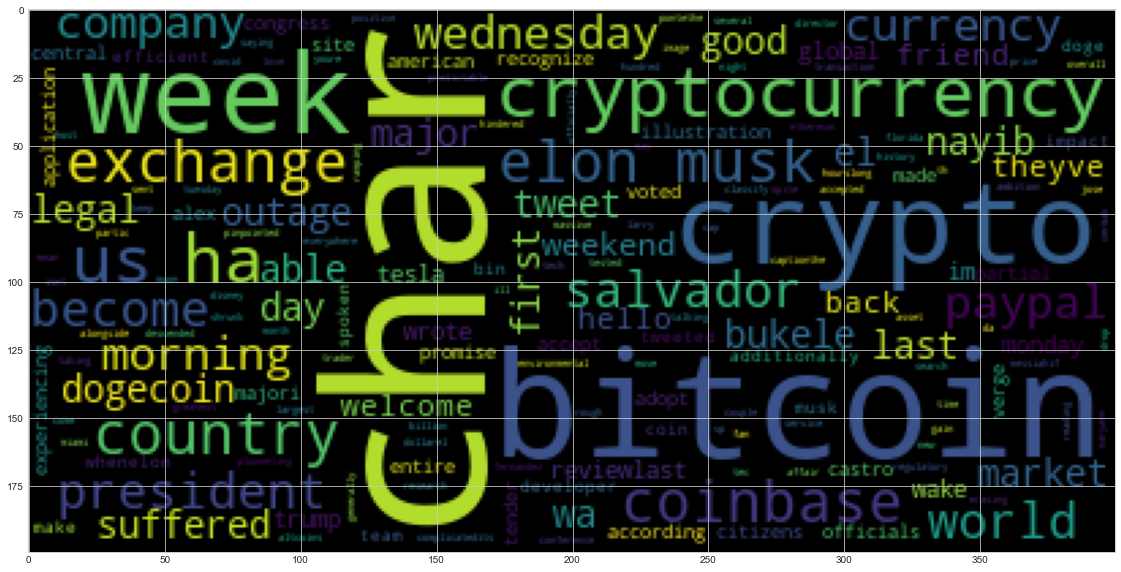

In [24]:
# Generate the Bitcoin word cloud
bitcoin_string = ' '.join(bitcoin_token_list)
bitcoin_wc = WordCloud().generate(bitcoin_string)
plt.imshow(bitcoin_wc)

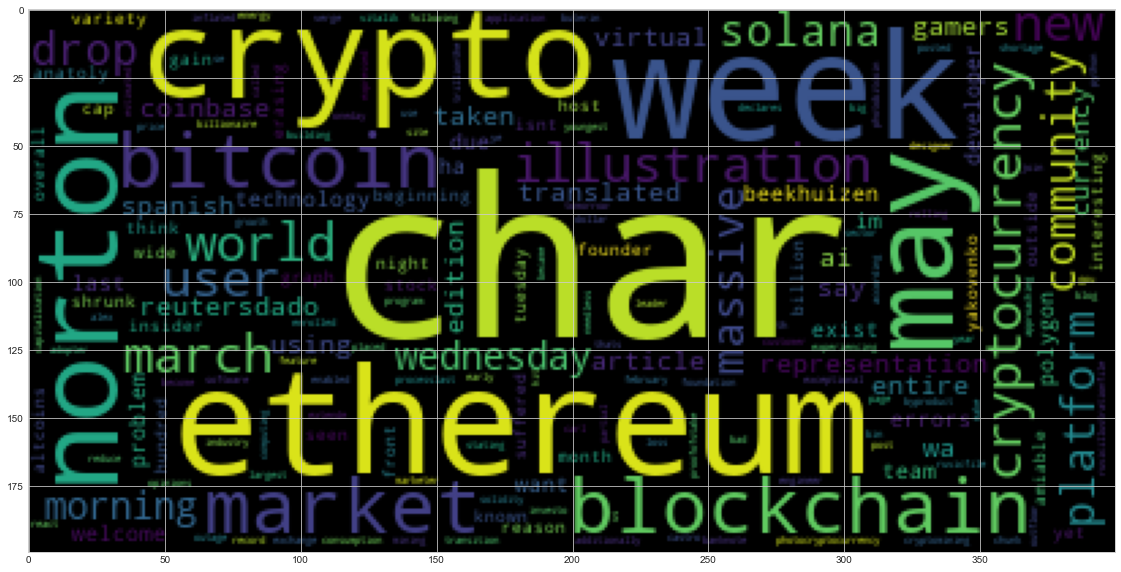

In [25]:
# Generate the Ethereum word cloud
ethereum_string = ' '.join(ethereum_token_list)
ethereum_wc = WordCloud().generate(ethereum_string)
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
bitcoin_text_list = bitcoin_df['text'].str.cat()
bitcoin_text_list

'El Salvador\'s President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country\'s congress voted to accept the cryptocurrency by a majori… [+1414 chars]El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars]Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its entire site and application. Additionally, both Coinbase and Bin… [+1307 chars]Last week, whenElon Musk tweeted that he had spoken with the team of Doge developers about how to make the coin more efficient, the impact was predictable: It sent Dogecoin to the moon. It was just t… [+3313 chars]That love affair between Elon Musk and Bitcoin? It\'s just become complicated.\xa0\r\nIt\'s been a rough couple of days in crypto world,

In [30]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_text_list)

# Add a title to the document


In [31]:
# Render the visualization
displacy.render(doc, style='ent')

In [32]:
# List all Entities
entities = [ent.text for ent in doc.ents]
entities

["El Salvador's",
 'Nayib Bukele',
 'Central American',
 'Salvador',
 'first',
 'Nayib Bukele',
 'Wednesday',
 'Citizens',
 'Alex Castro',
 'The Verge\r\n\n \n\n Cryptocurrency',
 'Coinbase',
 'this morning',
 'Coinbase',
 'Bin',
 '+1307 chars]Last week',
 'Musk',
 'Dogecoin',
 'Elon Musk',
 'Bitcoin',
 'Bitcoin',
 'Ethereum',
 'Altcoins',
 'Tuesday night',
 'Wednesday',
 'morning',
 'months',
 'hundreds of billions',
 'hours-long',
 'this morning',
 'May 19th',
 'US',
 'El Salvador',
 'first',
 'Bitcoin',
 'Miami',
 'Florida',
 'last weekend',
 'covid-19',
 'Larry Cermak',
 'Last week',
 'Disney',
 'This week',
 'Tec',
 'PayPals',
 'Wednesday',
 'Jose Fernandez da Pontethe',
 'Mary-Ann RussonBusiness',
 'BBC News',
 'US',
 'Donald Trump',
 'Fox Business',
 'Bitcoin',
 'US',
 'Photo',
 'Michele Doying',
 'Verge',
 'Iran',
 'Last week',
 'Trump',
 'This week',
 'Elon Musk’s',
 'PayPal',
 'Soon',
 'PayPal',
 'U.S.',
 'Bitcoin',
 'Coinbase',
 'Dogecoin',
 'Monday',
 'February',
 'Elon Mus

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
ethereum_text_list = ethereum_df['text'].str.cat()
ethereum_text_list

'Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 chars]Bitcoin, Ethereum and a host of Altcoins suffered massive drops Tuesday night and Wednesday morning, erasing months of gains and hundreds of billions in market cap. The overall crypto market shrunk m… [+1182 chars]A representation of virtual currency Ethereum is seen in front of a stock graph in this illustration taken February 19, 2021. REUTERS/Dado Ruvic/Illustration/File PhotoCryptocurrency Ethereum extende… [+1099 chars]GPU shortages and inflated prices have become a byproduct of the growth of cryptomining. Needless to say, that\'s bad news for the gamers that make up a big chunk of the computing industry\'s customer … [+1461 chars]Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its e

In [34]:
# Run the NER processor on all of the text
doc = nlp(ethereum_text_list)

# Add a title to the document
# YOUR CODE HERE!

In [35]:
# Render the visualization
displacy.render(doc, style='ent')

In [36]:
# List all Entities
entities = [ent.text for ent in doc.ents]
entities

['Solana',
 'Anatoly Yakovenko',
 'Ethereum',
 'Altcoins',
 'Tuesday night',
 'Wednesday',
 'morning',
 'months',
 'hundreds of billions',
 'Ethereum',
 'February 19, 2021',
 'Alex Castro',
 'The Verge\r\n\n \n\n Cryptocurrency',
 'Coinbase',
 'this morning',
 'Coinbase',
 'Bin',
 'Spanish',
 'AI',
 'Last May',
 'Buterin',
 '27',
 '99.95%',
 'Carl Beekhuizen',
 'the Ethereum Foundation',
 'Beekhuizen',
 'tomorrow',
 'Norton',
 'Norton',
 'Norton Crypto',
 'chars]"We',
 'Bitcoin',
 'U.S. Dollar',
 'May 26, 2020',
 'Dado Ruvic/File PhotoBitcoin',
 'last week',
 'one-day',
 'March last year',
 'Wednesday',
 '$1 trillion',
 'Entrepreneur',
 'March 2021',
 'more than one million',
 'SafeMoon',
 'decades',
 'Ill',
 'Jacks',
 'CriddleTechnology',
 'Kim Catdarshian',
 'Ethereum',
 'Spanish',
 'AI',
 'This week',
 'March 2020',
 'Ferdman/Getty Images',
 'Mark Cuban',
 'Ethereum',
 'Polygon',
 'Polygon',
 'tEhereum',
 'Last week',
 'Trump',
 'This week',
 'Elon Musk’s']

---